In [1]:
import tensorflow as tf
tf.keras.utils.get_file('satellitehurricaneimages.zip','https://storage.googleapis.com/download.tensorflow.org/data/certificate/satellitehurricaneimages.zip')

'C:\\Users\\Marketing\\.keras\\datasets\\satellitehurricaneimages.zip'

In [2]:
import os #operating system make available os function
import zipfile # zip and unzip

local_zip = 'C:\\Users\\marketing\\.keras\\datasets\\satellitehurricaneimages.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('satellitehurricaneimages')
zip_ref.close()

In [3]:
# Directory with our training damage pictures
train_dam_dir = os.path.join('satellitehurricaneimages/train/damage')

# Directory with our training no_damage pictures
train_no_dam_dir = os.path.join('satellitehurricaneimages/train/no_damage')

In [4]:
train_dam_dir

'satellitehurricaneimages/train/damage'

In [5]:
train_no_dam_dir

'satellitehurricaneimages/train/no_damage'

In [6]:
train_dam_names = os.listdir(train_dam_dir)
print(train_dam_names[:10])

['-93.55964_30.895018.jpeg', '-93.573763_30.693981.jpeg', '-93.578271_30.779923999999998.jpeg', '-93.59011_30.695412.jpeg', '-93.59030899999999_30.694764000000003.jpeg', '-93.590598_30.694956.jpeg', '-93.597636_30.674362.jpeg', '-93.599611_30.668616999999998.jpeg', '-93.601916_30.793329999999997.jpeg', '-93.602625_30.02372.jpeg']


In [7]:
train_no_dam_names = os.listdir(train_no_dam_dir)
print(train_no_dam_names[:10])

['-95.061275_29.831535.jpeg', '-95.061412_29.826522999999998.jpeg', '-95.061825_29.828608000000003.jpeg', '-95.061908_29.828245000000003.jpeg', '-95.061936_29.828088.jpeg', '-95.062117_29.828828.jpeg', '-95.06212_29.829257000000002.jpeg', '-95.062166_29.828609999999998.jpeg', '-95.062166_29.82945.jpeg', '-95.06218199999999_29.82831.jpeg']


In [8]:
len(train_dam_names)

5000

In [9]:
len(train_no_dam_names)

5000

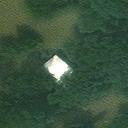

In [10]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
image1 = load_img('satellitehurricaneimages/train/damage/-93.55964_30.895018.jpeg')
image1

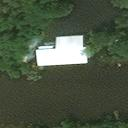

In [11]:
image2 = load_img('satellitehurricaneimages/train/damage/-93.602625_30.02372.jpeg')
image2

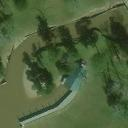

In [12]:
image3 = load_img('satellitehurricaneimages/train/no_damage/-95.061275_29.831535.jpeg')
image3

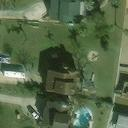

In [13]:
image4 = load_img('satellitehurricaneimages/train/no_damage/-95.06218199999999_29.82831.jpeg')
image4

In [14]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [15]:
image_count = len(glob('satellitehurricaneimages/*/*/*'))
print(image_count)
#includes both test and vaildation images, 2000 images for validation

12000


In [16]:
total_images = len(os.listdir(train_dam_dir))+len(os.listdir(train_no_dam_dir))
print(total_images)

10000


In [17]:
IMG_HIEGHT = 300
IMG_WIDHT = 300

In [18]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=25,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                    validation_split=0.2,)

In [19]:
train_data_gen = image_gen_train.flow_from_directory(directory='satellitehurricaneimages/train',
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    class_mode='binary')

Found 10000 images belonging to 2 classes.


In [20]:
train_data_gen.class_indices

{'damage': 0, 'no_damage': 1}

In [21]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
val_data_gen = image_gen_val.flow_from_directory(directory='satellitehurricaneimages/validation',
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                class_mode='binary')

Found 2000 images belonging to 2 classes.


In [22]:
val_data_gen.class_indices

{'damage': 0, 'no_damage': 1}

In [23]:
sample_data, label = next(train_data_gen)

In [24]:
sample_data.shape

(32, 300, 300, 3)

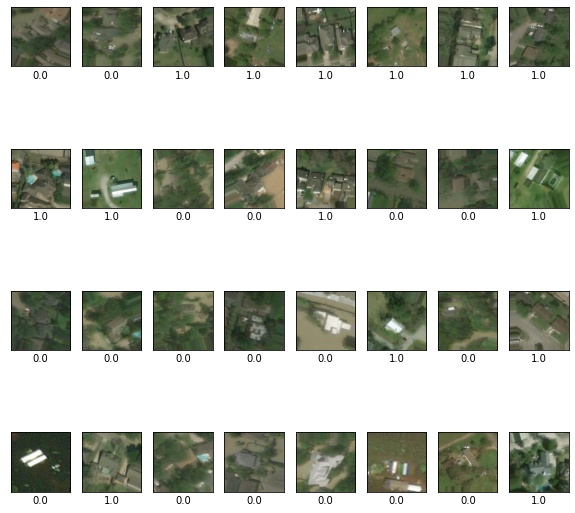

In [25]:
plt.figure(figsize=(10,10))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

In [26]:
from keras import layers
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (300, 300, 3),include_top = False, weights = 'imagenet')

In [27]:
for layer in base_model.layers:
    layer.trainable = False
    
base_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [28]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

vgg_model = tf.keras.models.Model(base_model.input, x)

In [29]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [30]:
vgg_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [2]:
import time
t1 = time.time()
history = vgg_model.fit(train_data_gen, epochs=5, validation_data=val_data_gen)
t2 = time.time()

NameError: name 'vgg_model' is not defined

In [1]:
print('Time to train model:',round((t2-t1)/60, 2), 'minutes')

NameError: name 't2' is not defined

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(300, 300 ,3), include_top=False, weights="imagenet")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)
#x = layers.Dense(16, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

res_net_model = tf.keras.models.Model(base_model.input, x)


res_net_model.summary()

In [ ]:
filepath = 'satellite.h5'